In [1]:
import numpy as np 
from numba import jit
from matplotlib import pyplot as plt

c:\Users\mlata\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[-1.08343425  5.83123227]


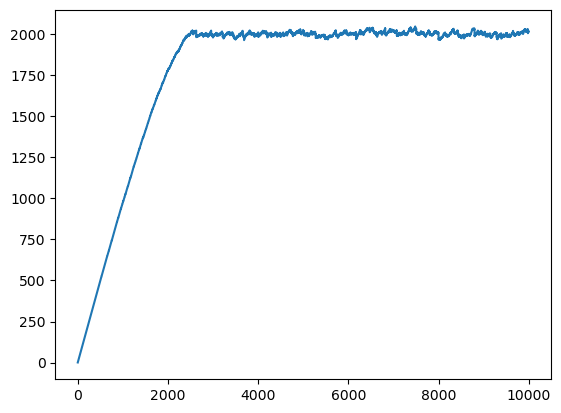

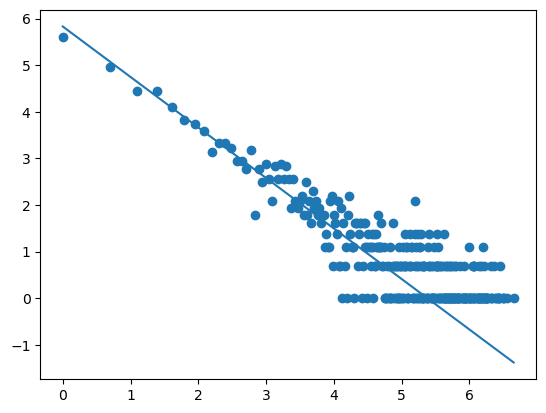

In [4]:
L = 31

lattice = np.zeros((L, L))
pc = 3
t = np.array(range(10000))
prog = 4000

@jit(nopython=True)
def evol(lattice):
  N = np.zeros_like(t)
  law_count = np.zeros_like(t)
  for time in t:
    law = []
    while(np.any(lattice > pc)):
      a = (lattice>pc).nonzero()
      N_points = len(a[0])
      for n in range(N_points):
        x = a[0][n]
        y= a[1][n]
        law.append((x, y))
        ns = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        for ind in ns:
          if ind[0] > L-1 or ind[0] < 0 or ind[1]>L-1 or ind[1]<0:
            continue
          lattice[ind] += 1
        lattice[x, y] -= 4
    if law:
      N[time] = np.sum(lattice)
      law_count[time] = len(set(law))
      continue
    x = np.random.randint(low=0, high=31)
    y = np.random.randint(low=0, high=31)
    lattice[x, y] +=1
    N[time] = np.sum(lattice)
    res =  [N, law_count]
  return res


res = evol(lattice)

N = res[0]
law_count=res[1][prog:]
law_count = law_count[law_count>0]


x, y = np.unique(law_count, return_counts=True)

from scipy.optimize import curve_fit

def line(x, a, b):
  return a*x+b

popt, pcov = curve_fit(line, np.log(x[1:int(len(x)/4)]), np.log(y[1:int(len(x)/4)]))

print(popt)
plt.plot(t, N)

plt.show()
plt.clf()
plt.scatter(np.log(x), np.log(y))
plt.plot(np.log(x), popt[0]*np.log(x)+popt[1])




In [2]:
L = 201

lattice = np.zeros((L, L))+7
pc = 3
t = np.array(range(50000))
prog = 40000
mod = 10

@jit(nopython=True)
def evol(lattice):
  N = [np.copy(lattice)]
  for time in t:
    law = []
    while(np.any(lattice > pc)):
      a = (lattice>pc).nonzero()
      N_points = len(a[0])
      for n in range(N_points):
        x = a[0][n]
        y= a[1][n]
        law.append((x, y))
        n = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        for ind in n:
          if ind[0] > L-1 or ind[0] < 0 or ind[1]>L-1 or ind[1]<0:
            continue
          lattice[ind] += 1
        lattice[x, y] -= 4
    if law:
      if time%mod ==0 and time>=prog:
        N.append(np.copy(lattice))
      continue
    # x = L//2
    # y = L//2
    # lattice[x, y] +=1
    if time%mod ==0 and time>=prog:
      N.append(np.copy(lattice))
  return N


res = evol(lattice)





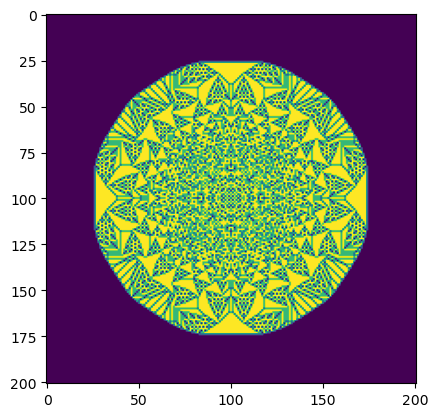

In [3]:
plt.imshow(res[-1])

In [2]:
import imageio

In [5]:
filenames = [f'img{i:06d}.png' for i in range(len(res))]

for n, l in enumerate(res):
  fig=plt.gcf()
  ax=fig.add_subplot(111)
  ax.set_title('Height of the Sandpile')
  cax = ax.imshow(l, interpolation='nearest', cmap="inferno")
  cax.set_clim(vmin=0, vmax=6)
  cbar = fig.colorbar(cax, ticks=[0,3, 5, 8], orientation='vertical')
  filename = filenames[n]
  plt.savefig(filename, dpi=100)
  plt.clf()

with imageio.get_writer(f'ev_pocz0_siatka201_od40000do50000.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

<Figure size 640x480 with 0 Axes>

In [13]:
L = 201

lattice = np.zeros((L, L))+7
pc = 3
t = np.array(range(200))
prog = 0
mod = 1

@jit(nopython=True)
def evol(lattice):
  N = [np.copy(lattice)]
  k=0
  cont=True
  while(np.any(lattice > pc)):
    a = (lattice>pc).nonzero()
    N_points = len(a[0])
    for n in range(N_points):
      x = a[0][n]
      y= a[1][n]
      ns = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
      for ind in ns:
        if ind[0] > L-1 or ind[0] < 0 or ind[1]>L-1 or ind[1]<0:
          continue
        lattice[ind] += 1
      lattice[x, y] -= 4
    k+=1
    if k%10==0:
      N.append(np.copy(lattice))
    if k>=2400:
      break
  return N


res = evol(lattice)





In [14]:
filenames = [f'img{i:06d}.png' for i in range(len(res))]

for n, l in enumerate(res):
  fig=plt.gcf()
  ax=fig.add_subplot(111)
  ax.set_title('Height of the Sandpile')
  cax = ax.imshow(l, interpolation='nearest', cmap="inferno")
  cax.set_clim(vmin=0, vmax=8)
  cbar = fig.colorbar(cax, ticks=[0,3, 5, 8], orientation='vertical')
  filename = filenames[n]
  plt.savefig(filename, dpi=100)
  plt.clf()

with imageio.get_writer(f'ev_pocz7_bez_dodawania.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

<Figure size 640x480 with 0 Axes>